# A Thermodynamic Model of Spinodal Decomposition

*Johannes Margraf*

In this notebook, we will build a simple model to understand the phenomenon of spinodal decomposition. This is a process, by which a mixture of two or more components spontaneously de-mixes into two phases. Unlike suggested by classical nucleation theory, spinodal decomposition happens throughout the whole volume more or less at the same time, without the need for a seed that grows from a certain point in the mixed phase. To understand why and when this happens, we start with the free energy of mixing. More background on the thermodynamics of mixing (and more) can be found [here](https://www.doitpoms.ac.uk/tlplib/phase-diagrams/freeenergy.php).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmin
import matplotlib as mpl
cmap = mpl.colormaps['inferno']

The quantity of interest for determining the stability of a binary mixture of solids or liquids is the free energy of mixing, which depends on the composition of the mixture and the temperature (and other factors like pressure). This is given by:

$$
\Delta G_\mathrm{mix} = \Delta H_\mathrm{mix} - T \Delta S_\mathrm{mix}
$$

Here, $\Delta H_\mathrm{mix}$ is the mixing enthalpy and $S_\mathrm{mix}$ is the mixing entropy. As a simple model, we can assume that these terms are purely composition dependent and use the following expression for them:

$$
\Delta G_\mathrm{mix} = W x_A x_B + RT [x_A \ln(x_A) + x_B \ln(x_B)]
$$

Here, $x_A$ and $x_B$ are the relative concentrations of the atoms or molecules $A$ and $B$, respectively. In this model, $\Delta H_\mathrm{mix}$ is always positive or zero. This means that there is a free energy penalty proportional to $W$ for mixed compositions, which corresponds to a situation where the $A-A$ and $B-B$ interactions are stronger than the $A-B$ interactions. On the other hand, the entropy term is always negative and favours mixing. Since it is proportional to $RT$ (the universal gas constant times the temperature), this leads to a situation where mixing is unstable at low temperatures but becomes favourable at high temperatures. Because $x_A+x_B=1$ for a binary mixture, we only need to consider a single variable $c$ for the composition in the following.

Using dimensionless units where $R=T=1$, we can plot the free energy for different temperatures as a function of $c$:

In [2]:
def G_mix(c,T):
    R = 1.
    W = 1.0
    x_A = c
    x_B = 1. - c
    return x_A*x_B*W + R*T*(x_A*np.log(x_A)+x_B*np.log(x_B))


In [3]:
c = np.linspace(0.001,0.999,20000)

for T in [0.0,0.3,0.4,0.5]:
    G_mix_T = G_mix(c,T)
    plt.plot(c,G_mix_T,color=cmap(T*1.7))
    arg_min = argrelmin(G_mix_T)[0]
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
    else:
        c_min=np.array([c[i] for i in arg_min])
    plt.scatter(c_min,G_mix_T[arg_min],color=cmap(T*1.7))
    
plt.xlim(0.0,1.0)
plt.ylim(-0.15,0.15)
plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)
plt.yticks()
#plt.savefig('01_example_G_curves.pdf',bbox_inches="tight")
plt.show()


We can see that at zero temperature, mixing is thermodynamically unfavourable ($\Delta G_\mathrm{mix}$ is postive) for all compositions. At intermediate temperatures, we observe two minima forming at small and large values of $c$. Indeed, there are always such minima when $T > 0$ because the gradient of the entropy is infinite at $c=0$ and $c=1$ (due to the divergence of the $\ln$). At high temperatures, the minima merge to a single minimum at $c=\frac{1}{2}$.

We can distinguish three situations: If $\Delta G_\mathrm{mix}$ is positive everywhere, $A$ and $B$ are simply imiscible. When the free energy curves displays two minima (*e.g.* at 0.2 and 0.8), we can also observe demixing. However, the two phases that form in this case are not pure phases of $A$ and $B$. Instead, a system with average composition $c=0.5$ decomposes into two phases with $c=0.2$ and $c=0.8$, respectively (an $A$-rich and $B$-rich phase). If the mean composition is to the right or left of both minima, no demixing occurs. Finally, if a single minimum exists, $A$ and $B$ form a single mixed phase, regardless of the composition. 

Based on this insight, we can now construct a phase diagram, by plotting the location of these minima for a series of temperatures:

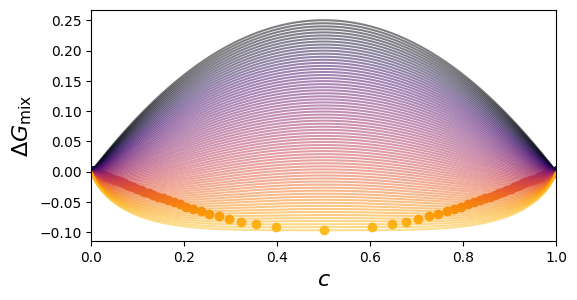

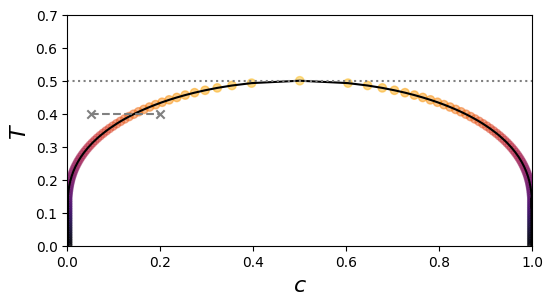

In [4]:
T_binodal = []
c_binodal = []
T_spinodal = []
c_spinodal = []

plt.figure(figsize=(6, 3), dpi=100)
c = np.linspace(0.001,0.999,20000)
for T in np.linspace(0.0,0.5,70):
    G_mix_T = G_mix(c,T)
    d_mix_T = np.gradient(G_mix_T)
    d_mix_T = np.abs(np.gradient(d_mix_T))
    arg_min = argrelmin(G_mix_T)[0]
    arg_min_grad = argrelmin(d_mix_T)[0]
    #print(arg_min)
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
        c_spi=np.array([c[i] for i in arg_min_grad])
    else:
        c_min=np.array([c[i] for i in arg_min])
        c_spi=np.array([c[i] for i in arg_min_grad])
    #print(c_min)
    for minimum in c_min:
        c_binodal.append(minimum)
        T_binodal.append(T)
    for minimum in c_spi:
        c_spinodal.append(minimum)
        T_spinodal.append(T)
    plt.plot(c,G_mix_T,alpha=0.5,color=cmap(T*1.7))
    plt.scatter(c_min,G_mix_T[arg_min],color=cmap(T*1.7))
    #plt.scatter(c_spi,G_mix_T[arg_min_grad])

c_binodal = np.array(c_binodal)
arg_binodal = np.argsort(c_binodal)
T_binodal = np.array(T_binodal)
c_spinodal = np.array(c_spinodal)
T_spinodal = np.array(T_spinodal)

plt.xlim(0.0,1.0)
plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)

#plt.savefig('02_all_G_curves.pdf',bbox_inches="tight")
plt.show()
#print(c_binodal,T_binodal)

plt.figure(figsize=(6, 3), dpi=100)
plt.scatter(c_binodal,T_binodal,color=cmap(T_binodal*1.7),alpha=0.5)
plt.plot(c_binodal[arg_binodal],T_binodal[arg_binodal],c='k')
plt.scatter([0.05,0.2],[0.4,0.4],color='gray',marker='x')
plt.plot([0.05,0.2],[0.4,0.4],color='gray',linestyle='--')

#plt.scatter(c_spinodal,T_spinodal)

plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$T$",fontsize=16)

plt.axhline(0.5,color='gray',linestyle=':')
#plt.axhline(0.15,color='gray',linestyle=':')


plt.xlim(0.0,1.0)
plt.ylim(0.0,0.7)
#plt.savefig('03_binodal_phase_diagram_trans.pdf',bbox_inches="tight")
plt.show()

This diagram is just a visualization of the three regimes we just discussed. Above a dimensionless temperature of 0.5, all proportions of $A$ and $B$ are completely miscible. This threshold is called the *upper critical solution temperature* (UCST). The area under the curve is called the *miscibility gap*, since it denotes the part of the phase diagram where a single phase is thermodynamically unstable. The lines delimiting the miscibility gap are called *binodals*.

Depending on the composition, stable mixtures can also be obtained below the UCST. If we now modify the composition by adding more $B$, we move towards the phase boundary and subsequently into the miscibility gap (illustrated by the dashed grey line). Looking at the corresponding free energy curve, we can see that decomposition into two phases would indeed be thermodynamically favourable. But there is a problem: Since we slowly moved the system from a homogeneous mixture into the miscibility gap, the system needs to somehow get from the one-phase to the two-phase state. Clearly, it cannot simply jump to the new state, but the distribution of $A$ and $B$ needs to continuously change.

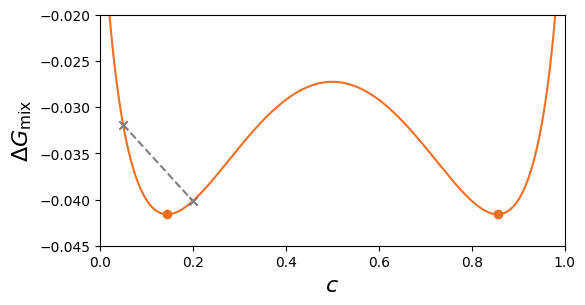

In [5]:
plt.figure(figsize=(6, 3), dpi=100)
for T in [0.4]:
    G_mix_T = G_mix(c,T)
    plt.plot(c,G_mix_T,color=cmap(T*1.7),zorder=0)
    arg_min = argrelmin(G_mix_T)[0]
    arg1 = np.argwhere(np.isclose(c,np.ones_like(c)*0.05,atol=0.998/20000.))[0]
    arg2 = np.argwhere(np.isclose(c,np.ones_like(c)*0.2,atol=0.998/20000.))[0]
 
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
    else:
        c_min=np.array([c[i] for i in arg_min])
    plt.scatter([c[arg1],c[arg2]],[G_mix_T[arg1],G_mix_T[arg2]],color='gray',marker='x')
    plt.plot([c[arg1],c[arg2]],[G_mix_T[arg1],G_mix_T[arg2]],color='gray',linestyle='--')

    plt.scatter(c[arg_min],G_mix_T[arg_min],color=cmap(T*1.7),zorder=1)

plt.xlim(0.0,1.0)
plt.ylim(-0.045,-0.020)
plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)
plt.yticks()
#plt.savefig('04_free_energy_04_02.pdf',bbox_inches="tight")

plt.show()


In the following, we will describe the distribution of our components in terms of two-dimensional grid of cells. Starting from an initial homogeneous distribution where each cell has a composition $c=0.2$, small density fluctuations can lead to slightly lower or higher densities in certain cells. This is shown below for two neighboring cells. 

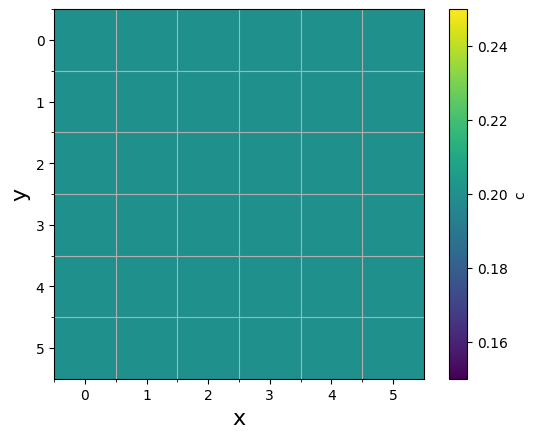

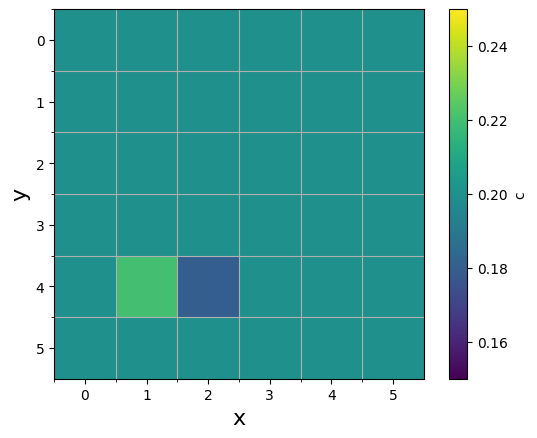

In [9]:
A = np.ones((6,6))*0.2
plt.imshow(A,vmin=0.15,vmax=0.25)
plt.yticks(np.arange(-.5, 5, 1), minor=True)
plt.xticks(np.arange(-.5, 5, 1), minor=True)
plt.grid(which='minor')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.colorbar(label='c')
#plt.savefig('05a_no_fluctuation.pdf',bbox_inches="tight")

plt.show()
A[4,1] += 0.02
A[4,2] -= 0.02
plt.imshow(A,vmin=0.15,vmax=0.25)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.colorbar(label='c')
plt.yticks(np.arange(-.5, 5, 1), minor=True)
plt.xticks(np.arange(-.5, 5, 1), minor=True)

plt.grid(which='minor')
#plt.savefig('05b_fluctuation',bbox_inches="tight")

plt.show()

[0.00010086]


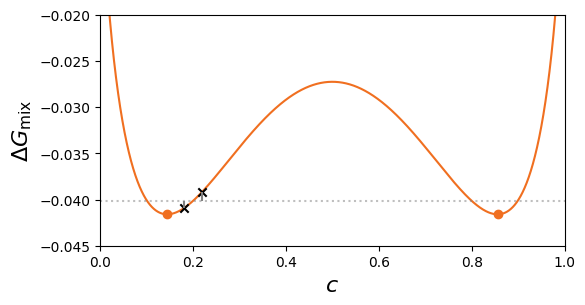

In [10]:
plt.figure(figsize=(6, 3), dpi=100)

for T in [0.4]:
    G_mix_T = G_mix(c,T)
    plt.plot(c,G_mix_T,color=cmap(T*1.7),zorder=0)
    arg_min = argrelmin(G_mix_T)[0]
    arg = np.argwhere(np.isclose(c,np.ones_like(c)*0.2,atol=0.998/20000.))[0]
    argplus  = np.argwhere(np.isclose(c,np.ones_like(c)*0.2 + 0.02,atol=0.998/20000.))[0]
    argminus = np.argwhere(np.isclose(c,np.ones_like(c)*0.2 - 0.02,atol=0.998/20000.))[0]
    args = [argminus,argplus]
    
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
    else:
        c_min=np.array([c[i] for i in arg_min])
    #plt.scatter([c[arg]],G_mix_T[arg],color='k',marker='x')
    plt.axhline(G_mix_T[arg],color='gray',alpha=0.5,linestyle=':')
    plt.vlines(c[args],[G_mix_T[arg],G_mix_T[arg]],G_mix_T[args],color='gray')
    plt.scatter(c[arg_min],G_mix_T[arg_min],color=cmap(T*1.7),zorder=1)
    plt.scatter(c[args],G_mix_T[args],color='k',marker='x')
    print(0.5*(G_mix_T[argplus]+G_mix_T[argminus])-G_mix_T[arg])

plt.xlim(0.0,1.0)
plt.ylim(-0.045,-0.020)
plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)
plt.yticks()
#plt.savefig('06_fluctuation_energy02.pdf',bbox_inches="tight")
plt.show()


As shown above, this means that the energy is slightly lower in one cell and slightly higher in the other one. However, due to the curvature of the free energy surface, the net energy difference compared to the homogeneous system is positive. As a consequence, the system cannot spontaneously move to the phase separated state. Instead, the phase transition occurs according to classical nucleation theory. In the absence of nucleation centers, the homogeneous state can be metastable even if it is thermodynamically less favourable.

Next, let's consider what happens if we move further into the miscibility gap:

In [11]:
T_binodal = []
c_binodal = []
T_spinodal = []
c_spinodal = []
plt.figure(figsize=(6, 3), dpi=100)

c = np.linspace(0.001,0.999,20000)
for T in np.linspace(0.0,0.5,70):
    G_mix_T = G_mix(c,T)
    d_mix_T = np.gradient(G_mix_T)
    d_mix_T = np.abs(np.gradient(d_mix_T))
    arg_min = argrelmin(G_mix_T)[0]
    arg_min_grad = argrelmin(d_mix_T)[0]
    #print(arg_min)
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
        c_spi=np.array([c[i] for i in arg_min_grad])
    else:
        c_min=np.array([c[i] for i in arg_min])
        c_spi=np.array([c[i] for i in arg_min_grad])
    #print(c_min)
    for minimum in c_min:
        c_binodal.append(minimum)
        T_binodal.append(T)
    for minimum in c_spi:
        c_spinodal.append(minimum)
        T_spinodal.append(T)
    #plt.plot(c,G_mix_T,alpha=0.5,color=cmap(T*1.7))
    #plt.scatter(c_min,G_mix_T[arg_min],color=cmap(T*1.7))
    #plt.scatter(c_spi,G_mix_T[arg_min_grad])

c_binodal = np.array(c_binodal)
arg_binodal = np.argsort(c_binodal)
T_binodal = np.array(T_binodal)
c_spinodal = np.array(c_spinodal)
T_spinodal = np.array(T_spinodal)

#plt.xlim(0.0,1.0)
#plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)

#plt.show()
#print(c_binodal,T_binodal)
plt.scatter(c_binodal,T_binodal,color=cmap(T_binodal*1.7),alpha=0.5)
plt.plot(c_binodal[arg_binodal],T_binodal[arg_binodal],c='k')
plt.scatter([0.05,0.2,0.4],[0.4,0.4,0.4],color='gray',marker='x')
plt.plot([0.05,0.2,0.4],[0.4,0.4,0.4],color='gray',linestyle='--')

#plt.scatter(c_spinodal,T_spinodal)

plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$T$",fontsize=16)

plt.axhline(0.5,color='gray',linestyle=':')
#plt.axhline(0.15,color='gray',linestyle=':')


plt.xlim(0.0,1.0)
plt.ylim(0.0,0.7)
#plt.savefig('07_binodal_phase_diagram_next_step.pdf',bbox_inches="tight")

plt.show()

Now, the same small density fluctuation leads to a decrease in free energy. This means that there is no longer a thermodynamic barrier for the phase transition, so that $A$ and $B$ can de-mix spontaneously, even without a nucleation event. 

In [13]:
c = np.linspace(0.001,0.999,20000)
plt.figure(figsize=(6, 3), dpi=100)

for T in [0.4]:
    G_mix_T = G_mix(c,T)
    plt.plot(c,G_mix_T,color=cmap(T*1.7),zorder=0)
    arg_min = argrelmin(G_mix_T)[0]
    arg = np.argwhere(np.isclose(c,np.ones_like(c)*0.4,atol=0.998/20000.))[0]
    argplus  = np.argwhere(np.isclose(c,np.ones_like(c)*0.4 + 0.02,atol=0.998/20000.))[0]
    argminus = np.argwhere(np.isclose(c,np.ones_like(c)*0.4 - 0.02,atol=0.998/20000.))[0]
    args = [argminus,argplus]
    
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
    else:
        c_min=np.array([c[i] for i in arg_min])
    #plt.scatter([c[arg]],G_mix_T[arg],color='k',marker='x')
    plt.axhline(G_mix_T[arg],color='gray',alpha=0.5,linestyle=':')
    plt.vlines(c[args],[G_mix_T[arg],G_mix_T[arg]],G_mix_T[args],color='gray')
    plt.scatter(c[arg_min],G_mix_T[arg_min],color=cmap(T*1.7),zorder=1)
    plt.scatter(c[args],G_mix_T[args],color='k',marker='x')
    print(0.5*(G_mix_T[argplus]+G_mix_T[argminus])-G_mix_T[arg])

plt.xlim(0.0,1.0)
plt.ylim(-0.045,-0.020)
plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)
plt.yticks()
#plt.savefig('08_fluctuation_energy04.pdf',bbox_inches="tight")
plt.show()


[-6.66227677e-05]


[-6.66227677e-05]


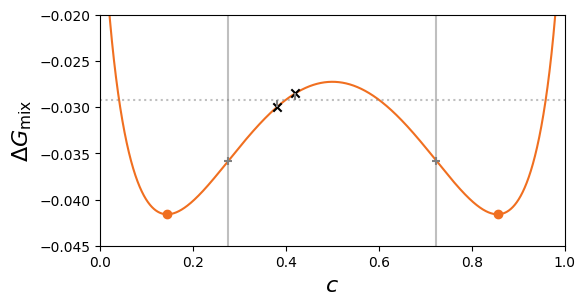

In [14]:
c = np.linspace(0.001,0.999,20000)
plt.figure(figsize=(6, 3), dpi=100)

for T in [0.4]:
    G_mix_T = G_mix(c,T)
    plt.plot(c,G_mix_T,color=cmap(T*1.7),zorder=0)
    d_mix_T = np.gradient(G_mix_T)
    d_mix_T = np.abs(np.gradient(d_mix_T))
    arg_min = argrelmin(G_mix_T)[0]
    arg_min_grad = argrelmin(d_mix_T)[0]
    arg = np.argwhere(np.isclose(c,np.ones_like(c)*0.4,atol=0.998/20000.))[0]
    argplus  = np.argwhere(np.isclose(c,np.ones_like(c)*0.4 + 0.02,atol=0.998/20000.))[0]
    argminus = np.argwhere(np.isclose(c,np.ones_like(c)*0.4 - 0.02,atol=0.998/20000.))[0]
    args = [argminus,argplus]
    if len(arg_min_grad)>2:
        #print(arg_min_grad)
        arg_min_grad = arg_min_grad[[0,-1]]
    #print(arg_min)
    if len(arg_min)==0:
        arg_min = [0,-1]
        c_min=np.array([c[0],c[-1]])
        c_spi=np.array([c[i] for i in arg_min_grad])
    else:
        c_min=np.array([c[i] for i in arg_min])
        c_spi=np.array([c[i] for i in arg_min_grad])
        
    #plt.scatter([c[arg]],G_mix_T[arg],color='k',marker='x')
    plt.axhline(G_mix_T[arg],color='gray',alpha=0.5,linestyle=':')
    plt.scatter(c_spi,G_mix_T[arg_min_grad],color='gray',marker='+')
    plt.axvline(c_spi[0],color='gray',alpha=0.5,linestyle='-')
    plt.axvline(c_spi[1],color='gray',alpha=0.5,linestyle='-')

    plt.vlines(c[args],[G_mix_T[arg],G_mix_T[arg]],G_mix_T[args],color='gray')
    plt.scatter(c[arg_min],G_mix_T[arg_min],color=cmap(T*1.7),zorder=1)
    plt.scatter(c[args],G_mix_T[args],color='k',marker='x')
    print(0.5*(G_mix_T[argplus]+G_mix_T[argminus])-G_mix_T[arg])

plt.xlim(0.0,1.0)
plt.ylim(-0.045,-0.020)
plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$\Delta G_\mathrm{mix}$",fontsize=16)
plt.yticks()
#plt.savefig('08b_fluctuation_energy04_spinodal.pdf',bbox_inches="tight")
plt.show()

As mentioned above, whether the fluctuations cause an increase or decrease in $\Delta G_\mathrm{mix}$ depends on the curvature of the free energy surface. Mathematically, this is captured by the second derivative $\frac{\partial^{2} \Delta G_\mathrm{mix}}{\partial c^{2}}$. We can thus identify an additional set of lines in the phase diagram, with the condition: 

$$
\frac{\partial^{2} \Delta G_\mathrm{mix}}{\partial c^{2}}=0
$$

These lines are called *spinodals*.

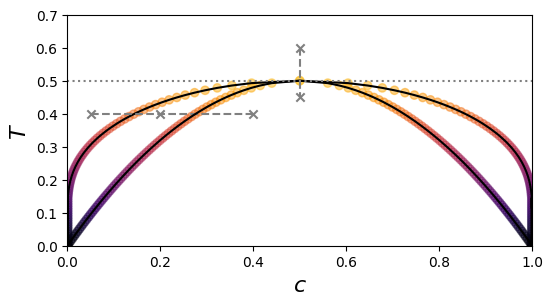

In [16]:
plt.figure(figsize=(6, 3), dpi=100)

plt.scatter(c_binodal,T_binodal,color=cmap(T_binodal*1.7),alpha=0.5)
plt.plot(c_binodal[arg_binodal],T_binodal[arg_binodal],c='k')
plt.scatter([0.05,0.2,0.4],[0.4,0.4,0.4],color='gray',marker='x')
plt.plot([0.05,0.2,0.4],[0.4,0.4,0.4],color='gray',linestyle='--')

plt.scatter([0.5,0.5],[0.6,0.45],color='gray',marker='x')
plt.plot([0.5,0.5],[0.6,0.45],color='gray',linestyle='--')

plt.scatter(c_spinodal,T_spinodal,color=cmap(T_binodal*1.7),alpha=0.5)
plt.plot(c_spinodal[arg_spinodal],T_spinodal[arg_spinodal],c='k')

plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$T$",fontsize=16)

plt.axhline(0.5,color='gray',linestyle=':')
#plt.axhline(0.15,color='gray',linestyle=':')

plt.xlim(0.0,1.0)
plt.ylim(0.0,0.7)

#plt.savefig('10b_phase_diagram_w_spinodal_critical_temp.pdf',bbox_inches="tight")
plt.show()

The spinodals now delimit the region where the mixed phase is not just thermodynamically but also kinetically unstable, since there is no free energy barrier for changing the composition towards a demixed state. We also see that the spinodal and binodals meet at the critical point. This means that we can directly move into the region of spinodal demixing when decreasing the temperature at the critical point.

Finally, we can also make a more schematic figure that highlights the different regions in the phase diagram: 

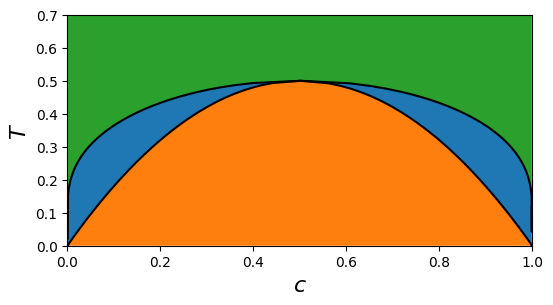

In [18]:
plt.figure(figsize=(6, 3), dpi=100)

T_binodal_inter = np.interp(c,c_binodal[arg_binodal],T_binodal[arg_binodal])
T_spinodal_inter = np.interp(c,c_spinodal[arg_spinodal],T_spinodal[arg_spinodal])

#plt.scatter(c_binodal,T_binodal,color=cmap(T_binodal*1.7),alpha=0.5)
plt.plot(c,T_binodal_inter,c='k')
#plt.scatter([0.05,0.2,0.4],[0.4,0.4,0.4],color='k',marker='x')
#plt.plot([0.05,0.2,0.4],[0.4,0.4,0.4],color='k')

#plt.scatter([0.5,0.5],[0.6,0.45],color='k',marker='x')
#plt.plot([0.5,0.5],[0.6,0.45],color='k')

#plt.scatter(c_spinodal,T_spinodal,color=cmap(T_binodal*1.7),alpha=0.5)
plt.plot(c,T_spinodal_inter,c='k')

plt.fill_between(c,T_binodal_inter,T_spinodal_inter)
plt.fill_between(c,0,T_spinodal_inter)
plt.fill_between(c,T_binodal_inter,0.7)

plt.xlabel(r"$c$",fontsize=16)
plt.ylabel(r"$T$",fontsize=16)

#plt.axhline(0.5,color='gray',linestyle=':')
#plt.axhline(0.15,color='gray',linestyle=':')

plt.xlim(0.0,1.0)
plt.ylim(0.0,0.7)
#plt.savefig('10b_phase_diagram_w_spinodal_discrete.pdf',bbox_inches="tight")

plt.show()

In the next post we'll see how the dynamics of spinodal decomposition can be simulated with a phasefield approach.